In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
dataset = pd.read_json('table_for_statistics.json')
player_transfers = pd.read_json('players_transfers.json')
player_transfers = player_transfers.loc[:, ['Player_id','Date','Fee']] 

In [99]:
player_transfers['year'] = player_transfers['Date'].str[-2:]
player_transfers.year = player_transfers.year.str.replace('-','01')

In [100]:
player_transfers = player_transfers.loc[~player_transfers['Fee'].str.contains('Loan')]
player_transfers = player_transfers.loc[player_transfers['Fee'].str.contains('[kmb]')]

In [101]:
def convert_value_to_euros(value):
    value = value.replace('€', '') 
    factor = 1
    if value.endswith('m'): 
        factor = 1000000
        value = value.replace('m', '')
    elif value.endswith('k'):
        factor = 1000
        value = value.replace('k', '')
    else:
        factor = 0
    return float(value)*factor

In [102]:
pd.set_option('display.max_rows', 20)
# player_transfers

In [103]:
player_transfers=player_transfers.drop(columns='Date')
player_transfers.year = player_transfers.year.astype(int)
idx = player_transfers.groupby('Player_id')['year'].idxmax()
player_transfers =player_transfers.loc[idx]

In [104]:
player_transfers['Fee']=player_transfers['Fee'].apply(convert_value_to_euros)
player_transfers = player_transfers[player_transfers['year'] <= 30]

In [105]:
df = dataset.copy()
df.head()

,id,total_squad,total_apperance,total_ppg,total_goals_in_clubs,total_assists,total_own_goal,total_sub_on,total_sub_off,total_yellow_card,...,current_market_value,highest_market_value,Team_ID,total_fix,goal_con_per_fix,clean_per_fix,goals_UCL,assists_UCL,apperance_UCL,current_teanm_MV
0,1020544,31,30,0.87,5,5,0,9,12,3,...,200000,200000,0,9,0.0,0.0,0,0,0,0
1,1011200,39,36,1.97,0,1,0,7,5,0,...,2500000,2500000,40,24,0.0,0.0,0,0,0,33200000
2,991649,26,21,1.52,0,1,0,4,1,4,...,300000,400000,1095,16,0.0,0.0,0,0,0,77300000
3,991487,11,9,1.22,2,1,0,2,1,0,...,100000,100000,0,6,0.0,0.0,0,0,0,0
4,988862,52,37,1.38,17,2,0,20,9,2,...,1000000,1000000,0,8,0.0,0.0,0,0,0,0


In [106]:
player_transfers = player_transfers.rename(columns={'Player_id':'id'})
df = pd.merge(df, player_transfers, on='id', how='left')

In [107]:
df.Fee.isnull().sum()
df.year.isnull().sum()
df['year'] = df['year'].fillna(10)
mean_score = df['Fee'].mean()
df['Fee'] = df['Fee'].fillna(mean_score)

In [108]:
mid_pos = ['Central Midfield', 'Attacking Midfield', 'Defensive Midfield','Left Midfield', 'Right Midfield']
att_pos = ['Centre-Forward','Right Winger', 'Left Winger','Second Striker']
def_pos = ['Centre-Back','Left-Back','Right-Back']
df['pos'] = 'GK'
df.loc[df['main_position'].isin(mid_pos), 'pos'] = 'MID'
df.loc[df['main_position'].isin(att_pos), 'pos'] = 'ATT'
df.loc[df['main_position'].isin(def_pos), 'pos'] = 'DEF'
df = df.drop(columns='main_position')

In [109]:
cols = list(df.columns)
cols.remove('current_market_value')
cols.append('current_market_value')
df = df[cols]

In [110]:
df.describe()

,id,total_squad,total_apperance,total_ppg,total_goals_in_clubs,total_assists,total_own_goal,total_sub_on,total_sub_off,total_yellow_card,...,total_fix,goal_con_per_fix,clean_per_fix,goals_UCL,assists_UCL,apperance_UCL,current_teanm_MV,Fee,year,current_market_value
count,8.234000e+03,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,...,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8.234000e+03,8.234000e+03,8234.000000,8.234000e+03
mean,3.162565e+05,287.052830,232.125334,1.480424,27.653024,17.687880,0.507408,46.189215,52.584649,31.476318,...,133.351470,0.148178,0.034211,0.412315,0.335317,3.506558,8.103440e+07,6.539776e+06,14.637357,3.754676e+06
std,2.039576e+05,161.964147,144.635367,0.239266,40.476651,22.938762,1.005273,39.485574,47.917172,27.217765,...,111.005489,0.425622,0.099803,3.285906,1.946047,11.777741,1.817945e+08,8.940862e+06,4.779139,9.793501e+06
min,2.150000e+02,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+03,1.000000,0.000000e+00
25%,1.470412e+05,160.000000,119.000000,1.330000,4.000000,2.000000,0.000000,16.000000,16.000000,11.000000,...,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000e+06,10.000000,2.000000e+05
50%,2.907155e+05,264.000000,208.000000,1.460000,13.000000,10.000000,0.000000,36.000000,39.000000,24.000000,...,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.539776e+06,14.000000,6.000000e+05
75%,4.527002e+05,393.000000,322.750000,1.630000,35.000000,24.000000,1.000000,68.000000,78.000000,44.000000,...,186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.900000e+07,6.539776e+06,19.000000,2.500000e+06
max,1.020544e+06,1152.000000,974.000000,3.000000,715.000000,339.000000,9.000000,272.000000,350.000000,232.000000,...,957.000000,4.000000,1.000000,140.000000,48.000000,183.000000,1.050000e+09,2.220000e+08,23.000000,1.800000e+08


In [111]:
df.isnull().sum()

id                      0
total_squad             0
total_apperance         0
total_ppg               0
total_goals_in_clubs    0
                       ..
current_teanm_MV        0
Fee                     0
year                    0
pos                     0
current_market_value    0
Length: 40, dtype: int64

In [112]:
# df.columns

In [113]:
df = df.drop(columns=['total_second_yellow_card', 'total_sub_off','total_sub_on','citizenship',
                      'highest_market_value','Team_ID','birth_place','full_name','id'])

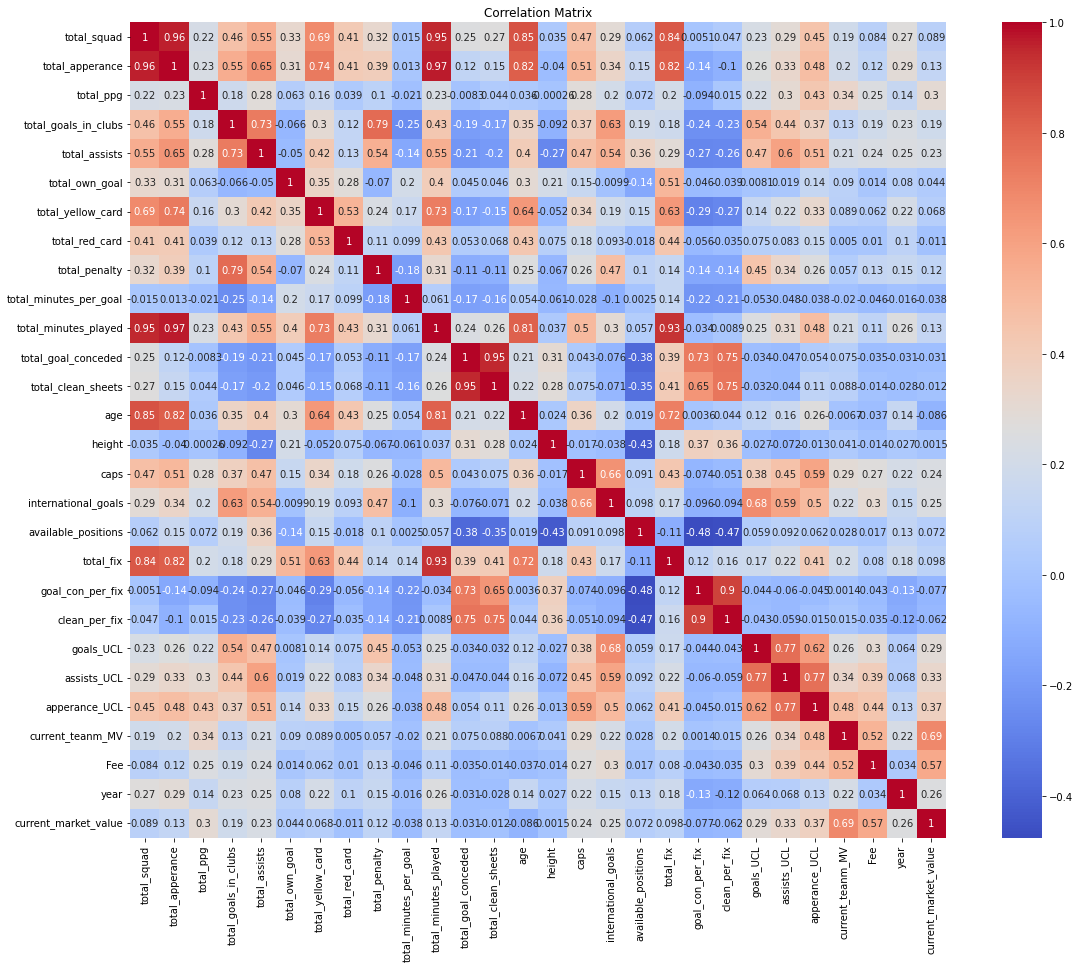

In [114]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [115]:
df = df.drop(columns=['total_squad','total_minutes_played','total_fix','current_teanm_MV','total_clean_sheets','total_goal_conceded','clean_per_fix'])

In [116]:
df.columns

Index(['total_apperance', 'total_ppg', 'total_goals_in_clubs', 'total_assists',
       'total_own_goal', 'total_yellow_card', 'total_red_card',
       'total_penalty', 'total_minutes_per_goal', 'age', 'height', 'foot',
       'nationality', 'caps', 'international_goals', 'available_positions',
       'goal_con_per_fix', 'goals_UCL', 'assists_UCL', 'apperance_UCL', 'Fee',
       'year', 'pos', 'current_market_value'],
      dtype='object')

In [117]:
# def flag_penalty(row):
#     if (row['age']>19):
#         if (row['total_penalty'] / (row['age'] - 19) > 2):
#             return 1
#         else:
#             return 0
#     else:
#         return 0

def set_value(row):
    if row['foot'] == 'both':
        return 2
    elif row['foot'] == 'left':
        return 1
    else:
        return 0



In [118]:
# df['total_penalty'] = df.apply(flag_penalty, axis=1)
df.loc[df.foot =='N/A','foot']= 'right'
df['foot'] = df.apply(set_value, axis=1)

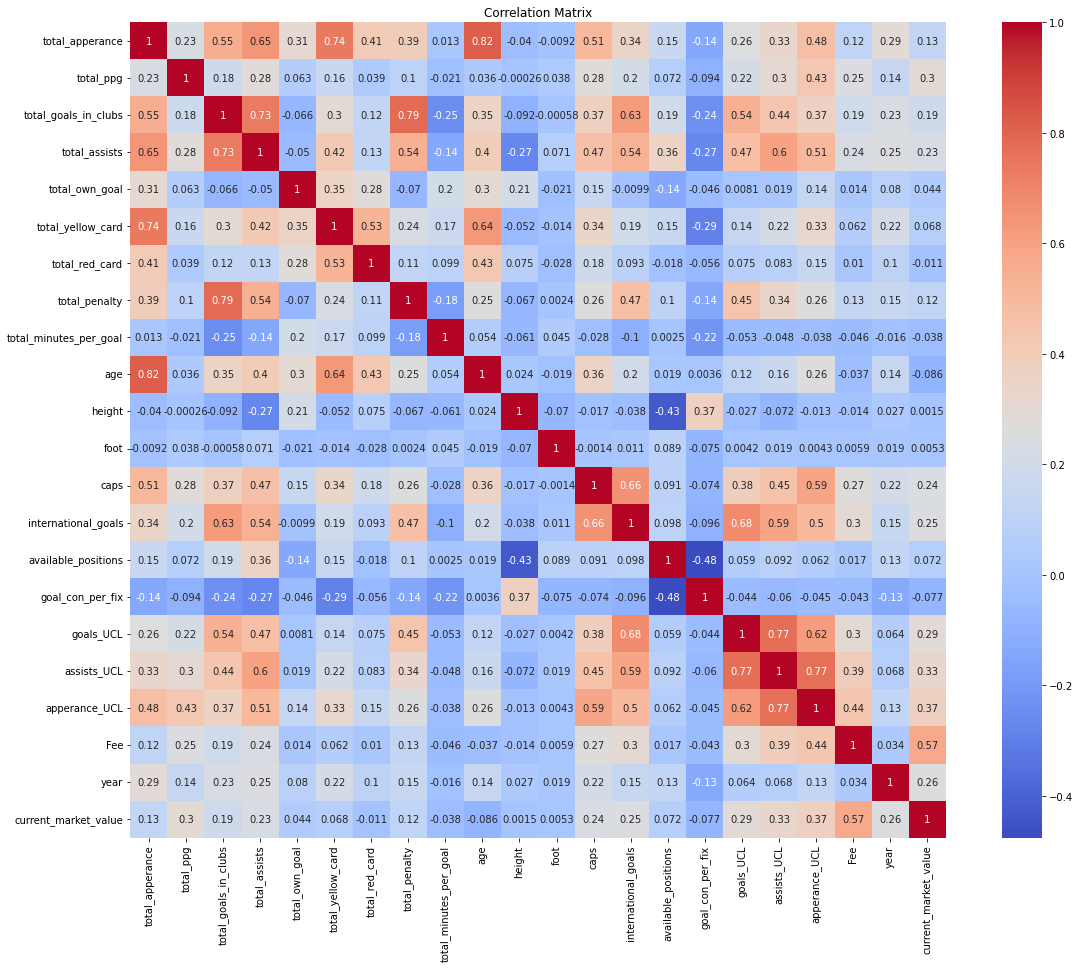

In [119]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [120]:
df.nationality = df.nationality.str.replace(' U15','')
df.nationality = df.nationality.str.replace(' U16','')
df.nationality = df.nationality.str.replace(' U17','')
df.nationality = df.nationality.str.replace(' U18','')
df.nationality = df.nationality.str.replace(' U19','')
df.nationality = df.nationality.str.replace(' U20','')
df.nationality = df.nationality.str.replace(' U21','')
df.nationality = df.nationality.str.replace(' U22','')
df.nationality = df.nationality.str.replace(' U23','')
df.nationality = df.nationality.str.replace(' B','')
df.nationality = df.nationality.str.replace("Cote d'",'Ivory Coast')
df.nationality = df.nationality.str.replace("England C",'England')
df.nationality = df.nationality.str.replace("Korea,",'South Korea')
df.nationality = df.nationality.str.replace("United",'USA')

A = ['Argentina','Brazil','France','England','Germany','Italy','Portugal','Spain']
B = ['Belgium','Croatia','Netherlands','Uruguay']
C = ['Colombia' , 'Senegal' , 'Serbia' , 'Poland' , 'Egypt' , 'Mexico' , 'Nigeria' ,
     'Denmark' , 'Ghana' , 'Ivory Coast' , 'Cameroon' , 'Morocco' , 'South Korea' ,
     'Japan' , 'Norway' ,'Switzerland', 'Scotland' , 'Sweden' , 'Wales' , 'USA']

df['nation_rank'] = 0
df.loc[df['nationality'].isin(A), 'nation_rank'] = 3
df.loc[df['nationality'].isin(B), 'nation_rank'] = 2
df.loc[df['nationality'].isin(C), 'nation_rank'] = 1
df.drop(columns='nationality')

,total_apperance,total_ppg,total_goals_in_clubs,total_assists,total_own_goal,total_yellow_card,total_red_card,total_penalty,total_minutes_per_goal,age,...,available_positions,goal_con_per_fix,goals_UCL,assists_UCL,apperance_UCL,Fee,year,pos,current_market_value,nation_rank
0,30,0.87,5,5,0,3,0,3,388,20,...,1,0.000000,0,0,0,6.539776e+06,10.0,MID,200000,0
1,36,1.97,0,1,0,0,1,0,0,20,...,1,0.000000,0,0,0,6.539776e+06,10.0,DEF,2500000,3
2,21,1.52,0,1,0,4,0,0,0,18,...,2,0.000000,0,0,0,6.539776e+06,10.0,DEF,300000,3
3,9,1.22,2,1,0,0,0,0,322,17,...,1,0.000000,0,0,0,6.539776e+06,10.0,MID,100000,1
4,37,1.38,17,2,0,2,0,0,106,19,...,1,0.000000,0,0,0,6.539776e+06,10.0,ATT,1000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8229,819,2.10,493,201,2,122,10,79,128,41,...,1,0.000000,48,28,124,2.100000e+07,12.0,ATT,2000000,1
8230,855,1.82,85,136,2,104,1,28,646,37,...,3,0.000000,4,16,73,2.200000e+07,10.0,MID,2000000,3
8231,496,1.59,30,5,1,138,7,0,1339,40,...,1,0.000000,0,0,0,1.200000e+06,10.0,DEF,100000,3
8232,277,1.55,1,0,1,16,3,0,0,38,...,1,1.242647,0,0,6,2.300000e+06,17.0,GK,200000,1


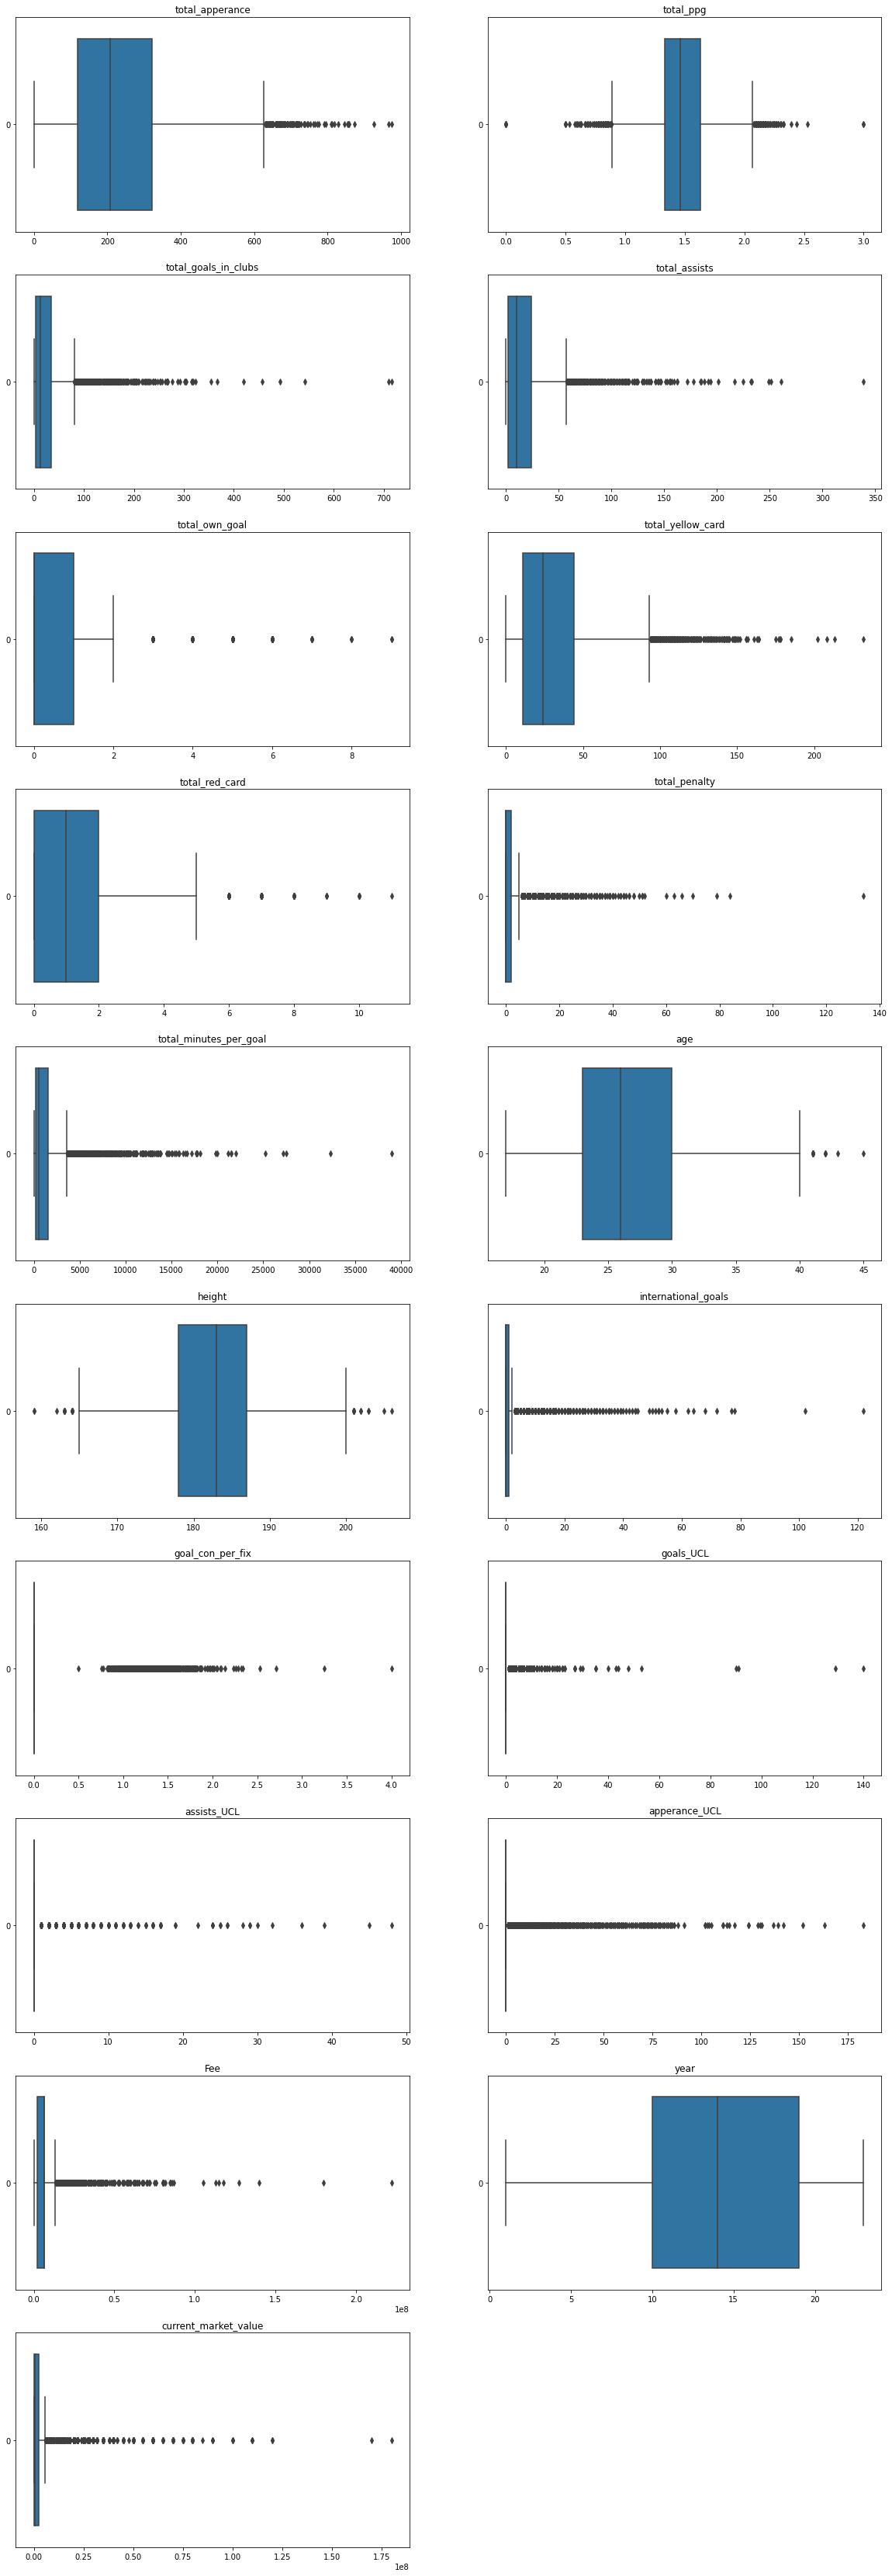

In [121]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(df['total_apperance'],orient="horizontal")
plt.title('total_apperance')
plt.subplot(10,2,2)
sns.boxplot(df['total_ppg'],orient="horizontal")
plt.title('total_ppg')
plt.subplot(10,2,3)
sns.boxplot(df['total_goals_in_clubs'],orient="horizontal")
plt.title('total_goals_in_clubs')
plt.subplot(10,2,4)
sns.boxplot(df['total_assists'],orient="horizontal")
plt.title('total_assists')
plt.subplot(10,2,5)
sns.boxplot(df['total_own_goal'],orient="horizontal")
plt.title('total_own_goal')
plt.subplot(10,2,6)
sns.boxplot(df['total_yellow_card'],orient="horizontal")
plt.title('total_yellow_card')
plt.subplot(10,2,7)
sns.boxplot(df['total_red_card'],orient="horizontal")
plt.title('total_red_card')
plt.subplot(10,2,8)
sns.boxplot(df['total_penalty'],orient="horizontal")
plt.title('total_penalty')
plt.subplot(10,2,9)
sns.boxplot(df['total_minutes_per_goal'],orient="horizontal")
plt.title('total_minutes_per_goal')
plt.subplot(10,2,10)
sns.boxplot(df['age'],orient="horizontal")
plt.title('age')
plt.subplot(10,2,11)
sns.boxplot(df['height'],orient="horizontal")
plt.title('height')
plt.subplot(10,2,12)
sns.boxplot(df['international_goals'],orient="horizontal")
plt.title('international_goals')
plt.subplot(10,2,13)
sns.boxplot(df['goal_con_per_fix'],orient="horizontal")
plt.title('goal_con_per_fix')
plt.subplot(10,2,14)
sns.boxplot(df['goals_UCL'],orient="horizontal")
plt.title('goals_UCL')
plt.subplot(10,2,15)
sns.boxplot(df['assists_UCL'],orient="horizontal")
plt.title('assists_UCL')
plt.subplot(10,2,16)
sns.boxplot(df['apperance_UCL'],orient="horizontal")
plt.title('apperance_UCL')
plt.subplot(10,2,17)
sns.boxplot(df['Fee'],orient="horizontal")
plt.title('Fee')
plt.subplot(10,2,18)
sns.boxplot(df['year'],orient="horizontal")
plt.title('year')
plt.subplot(10,2,19)
sns.boxplot(df['current_market_value'],orient="horizontal")
plt.title('current_market_value')
plt.show()


In [122]:
# sns.pairplot(df.iloc[:, :])
# plt.show()

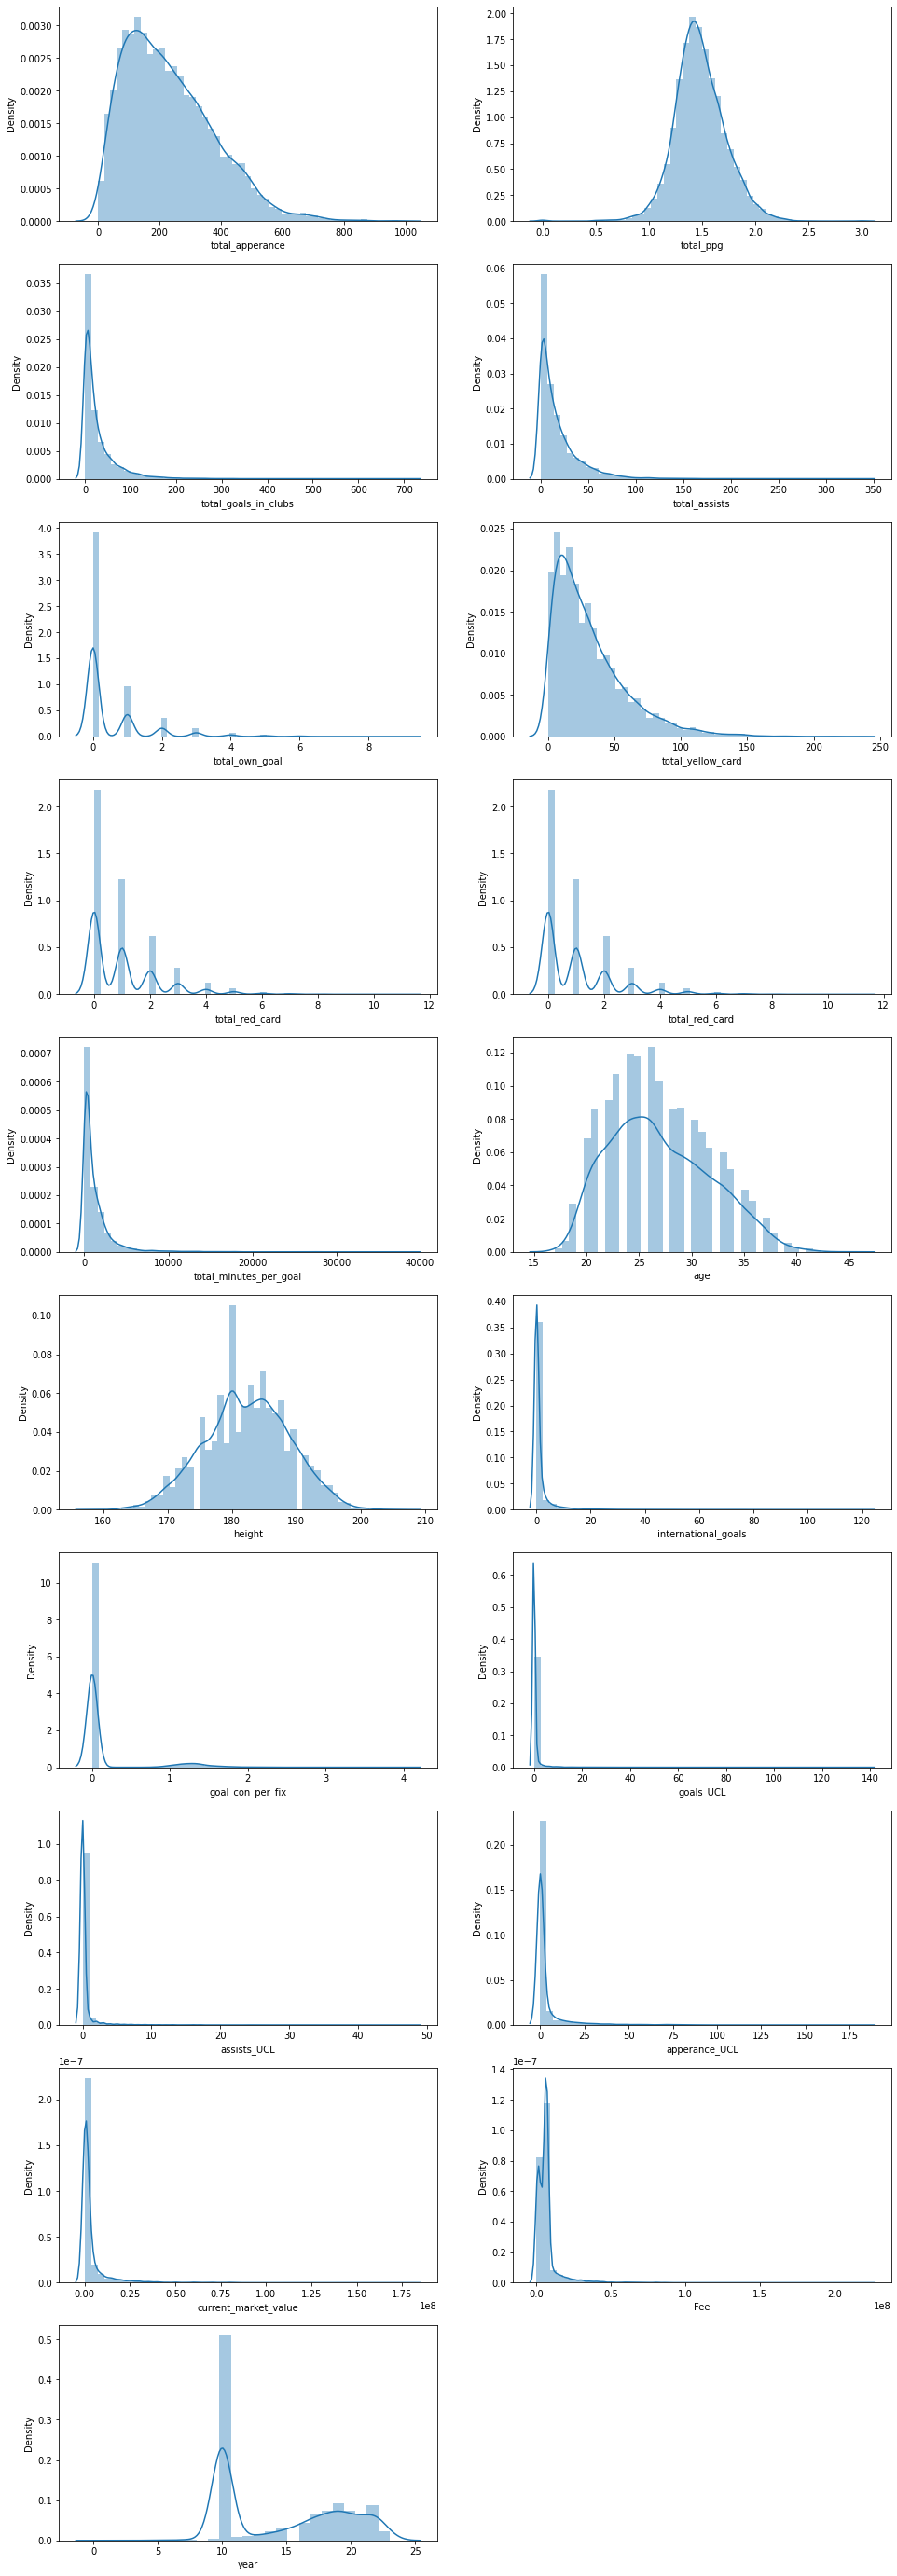

In [123]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(df['total_apperance'])
plt.subplot(10,2,2)
sns.distplot(df['total_ppg'])
plt.subplot(10,2,3)
sns.distplot(df['total_goals_in_clubs'])
plt.subplot(10,2,4)
sns.distplot(df['total_assists'])
plt.subplot(10,2,5)
sns.distplot(df['total_own_goal'])
plt.subplot(10,2,6)
sns.distplot(df['total_yellow_card'])
plt.subplot(10,2,7)
sns.distplot(df['total_red_card'])
plt.subplot(10,2,8)
sns.distplot(df['total_red_card'])
plt.subplot(10,2,9)
sns.distplot(df['total_minutes_per_goal'])
plt.subplot(10,2,10)
sns.distplot(df['age'])
plt.subplot(10,2,11)
sns.distplot(df['height'])
plt.subplot(10,2,12)
sns.distplot(df['international_goals'])
plt.subplot(10,2,13)
sns.distplot(df['goal_con_per_fix'])
plt.subplot(10,2,14)
sns.distplot(df['goals_UCL'])
plt.subplot(10,2,15)
sns.distplot(df['assists_UCL'])
plt.subplot(10,2,16)
sns.distplot(df['apperance_UCL'])
plt.subplot(10,2,17)
sns.distplot(df['current_market_value'])
plt.subplot(10,2,18)
sns.distplot(df['Fee'])
plt.subplot(10,2,19)
sns.distplot(df['year'])
plt.show()

In [124]:
upper_limit = df['total_ppg'].mean() + 3*df['total_ppg'].std()
lower_limit = df['total_ppg'].mean() - 3*df['total_ppg'].std()

print('Highest allowed',upper_limit)
print('Lowest allowed',lower_limit)

df['total_ppg'] = np.where(df['total_ppg']>upper_limit,upper_limit,np.where(df['total_ppg']<lower_limit,lower_limit,df['total_ppg']))

Highest allowed 2.198220965769265
Lowest allowed 0.7626267388700358


In [125]:
need_outlier_management = ['total_apperance','age','height','total_goals_in_clubs','total_assists']

for item in need_outlier_management:
    q1 = df[item].quantile(0.25)
    q3 = df[item].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    df[item] = np.where((df[item] < lower_bound), lower_bound, df[item])
    df[item] = np.where((df[item] > upper_bound), upper_bound, df[item])




upper_bound = 100
df['apperance_UCL'] = np.where((df['apperance_UCL'] > upper_bound), upper_bound, df['apperance_UCL'])

upper_bound = 20
df['assists_UCL'] = np.where((df['assists_UCL'] > upper_bound), upper_bound, df['assists_UCL'])

upper_bound = 80
df['goals_UCL'] = np.where((df['goals_UCL'] > upper_bound), upper_bound, df['goals_UCL'])

upper_bound = 50
df['international_goals'] = np.where((df['international_goals'] > upper_bound), upper_bound, df['international_goals'])

upper_bound = 720
df['total_minutes_per_goal'] = np.where((df['total_minutes_per_goal'] > upper_bound), upper_bound, df['total_minutes_per_goal'])

upper_bound = 50
df['goals_UCL'] = np.where((df['goals_UCL'] > upper_bound), upper_bound, df['goals_UCL'])


upper_bound = 120000000
df['Fee'] = np.where((df['Fee'] > upper_bound), upper_bound, df['Fee'])

upper_bound = 40
df['total_penalty'] = np.where((df['total_penalty'] > upper_bound), upper_bound, df['total_penalty'])


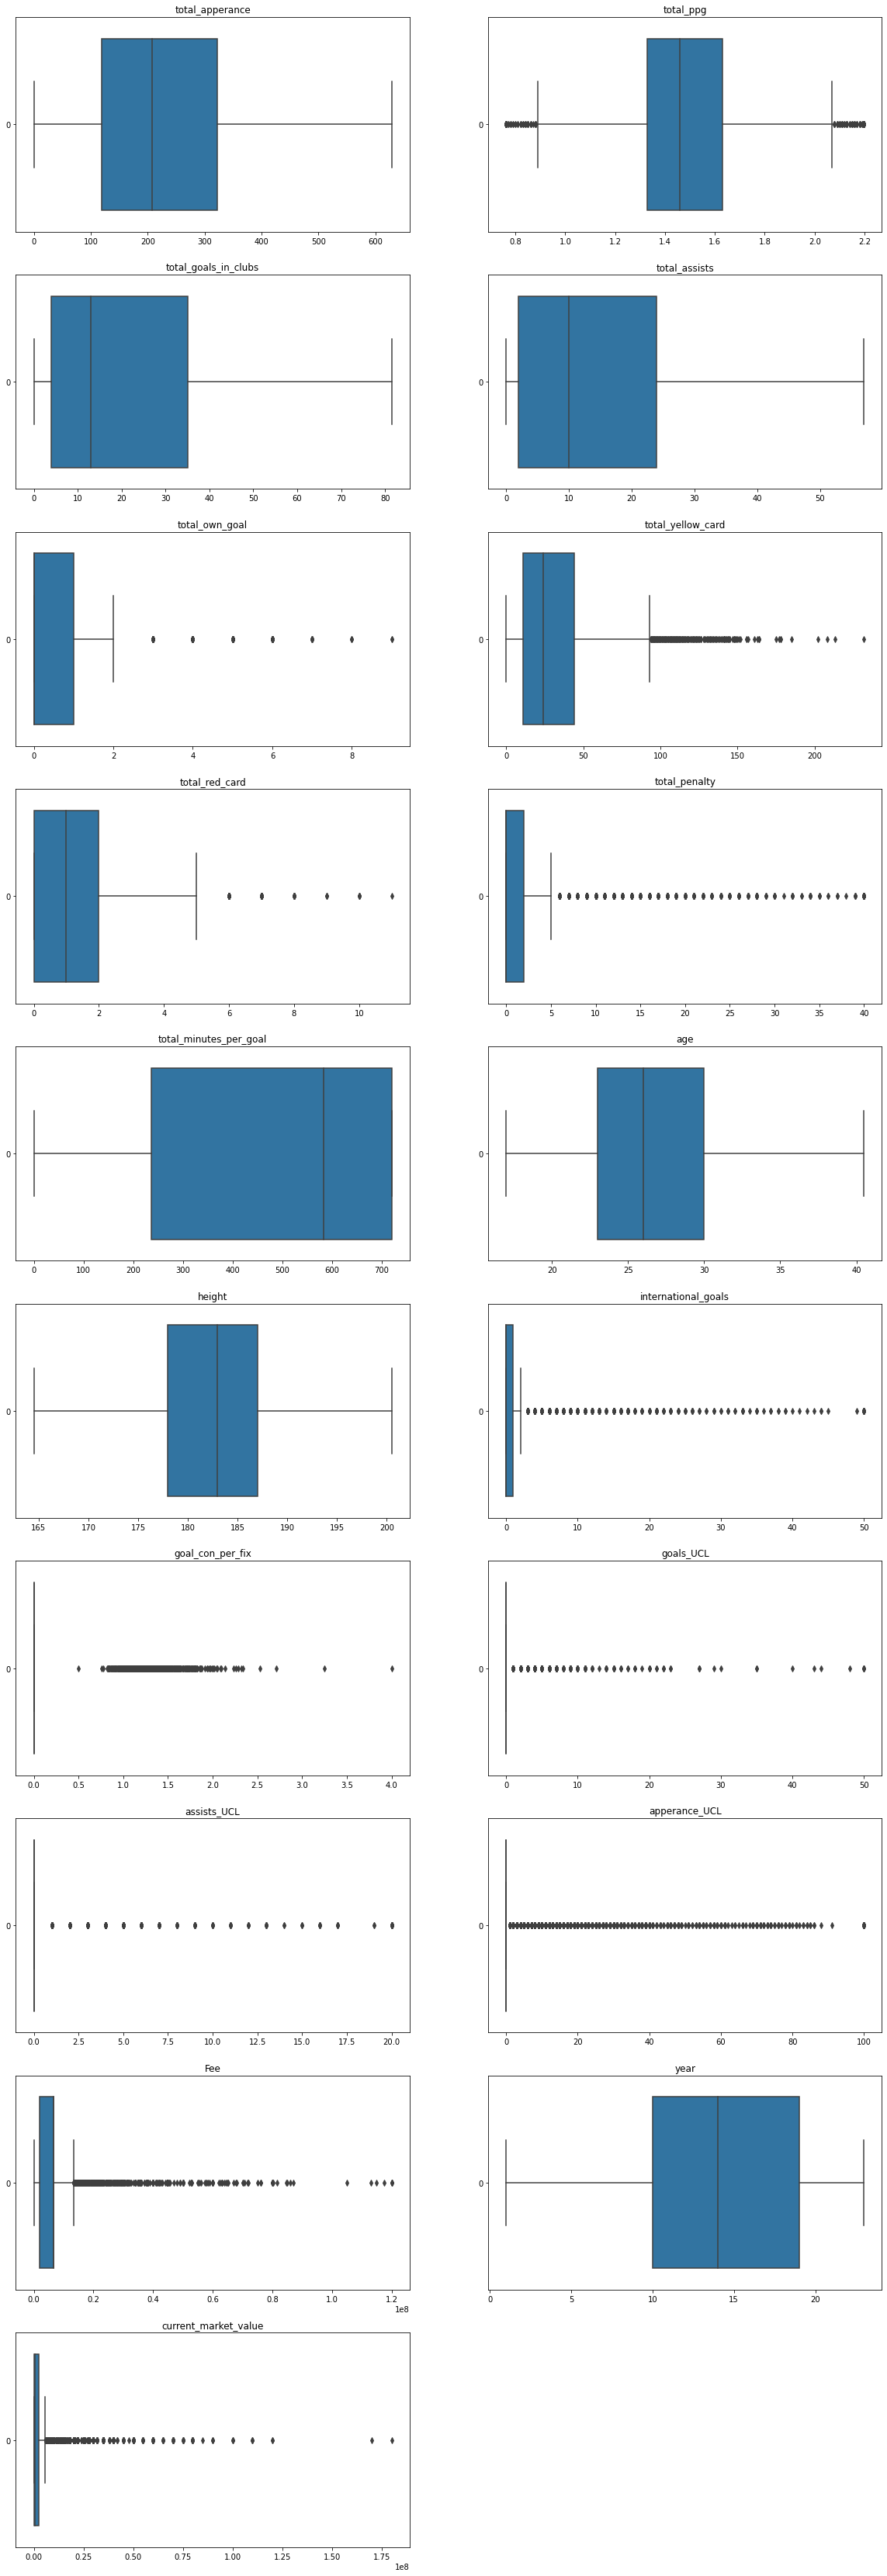

In [126]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(df['total_apperance'],orient="horizontal")
plt.title('total_apperance')
plt.subplot(10,2,2)
sns.boxplot(df['total_ppg'],orient="horizontal")
plt.title('total_ppg')
plt.subplot(10,2,3)
sns.boxplot(df['total_goals_in_clubs'],orient="horizontal")
plt.title('total_goals_in_clubs')
plt.subplot(10,2,4)
sns.boxplot(df['total_assists'],orient="horizontal")
plt.title('total_assists')
plt.subplot(10,2,5)
sns.boxplot(df['total_own_goal'],orient="horizontal")
plt.title('total_own_goal')
plt.subplot(10,2,6)
sns.boxplot(df['total_yellow_card'],orient="horizontal")
plt.title('total_yellow_card')
plt.subplot(10,2,7)
sns.boxplot(df['total_red_card'],orient="horizontal")
plt.title('total_red_card')
plt.subplot(10,2,8)
sns.boxplot(df['total_penalty'],orient="horizontal")
plt.title('total_penalty')
plt.subplot(10,2,9)
sns.boxplot(df['total_minutes_per_goal'],orient="horizontal")
plt.title('total_minutes_per_goal')
plt.subplot(10,2,10)
sns.boxplot(df['age'],orient="horizontal")
plt.title('age')
plt.subplot(10,2,11)
sns.boxplot(df['height'],orient="horizontal")
plt.title('height')
plt.subplot(10,2,12)
sns.boxplot(df['international_goals'],orient="horizontal")
plt.title('international_goals')
plt.subplot(10,2,13)
sns.boxplot(df['goal_con_per_fix'],orient="horizontal")
plt.title('goal_con_per_fix')
plt.subplot(10,2,14)
sns.boxplot(df['goals_UCL'],orient="horizontal")
plt.title('goals_UCL')
plt.subplot(10,2,15)
sns.boxplot(df['assists_UCL'],orient="horizontal")
plt.title('assists_UCL')
plt.subplot(10,2,16)
sns.boxplot(df['apperance_UCL'],orient="horizontal")
plt.title('apperance_UCL')
plt.subplot(10,2,17)
sns.boxplot(df['Fee'],orient="horizontal")
plt.title('Fee')
plt.subplot(10,2,18)
sns.boxplot(df['year'],orient="horizontal")
plt.title('year')
plt.subplot(10,2,19)
sns.boxplot(df['current_market_value'],orient="horizontal")
plt.title('current_market_value')
plt.show()


In [127]:
nominal_cols = ['pos']

for i in nominal_cols:
    print(df[i].value_counts())
    one_hot_encoded = pd.get_dummies(df[i],prefix=i)
    df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop(nominal_cols, axis=1)
df.head()

DEF    2643
MID    2401
ATT    2258
GK      932
Name: pos, dtype: int64


,total_apperance,total_ppg,total_goals_in_clubs,total_assists,total_own_goal,total_yellow_card,total_red_card,total_penalty,total_minutes_per_goal,age,...,assists_UCL,apperance_UCL,Fee,year,current_market_value,nation_rank,pos_ATT,pos_DEF,pos_GK,pos_MID
0,30.0,0.87,5.0,5.0,0,3,0,3,388,20.0,...,0,0,6.539776e+06,10.0,200000,0,0,0,0,1
1,36.0,1.97,0.0,1.0,0,0,1,0,0,20.0,...,0,0,6.539776e+06,10.0,2500000,3,0,1,0,0
2,21.0,1.52,0.0,1.0,0,4,0,0,0,18.0,...,0,0,6.539776e+06,10.0,300000,3,0,1,0,0
3,9.0,1.22,2.0,1.0,0,0,0,0,322,17.0,...,0,0,6.539776e+06,10.0,100000,1,0,0,0,1
4,37.0,1.38,17.0,2.0,0,2,0,0,106,19.0,...,0,0,6.539776e+06,10.0,1000000,0,1,0,0,0


Feature scailing

In [128]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['total_apperance', 'total_ppg', 'total_goals_in_clubs', 'total_assists',
                 'total_own_goal', 'total_yellow_card', 'total_red_card', 'total_penalty',
                 'total_minutes_per_goal', 'age', 'height', 'foot', 'caps',
                 'international_goals', 'available_positions','goal_con_per_fix', 'goals_UCL',
                 'assists_UCL', 'apperance_UCL', 'Fee','year','nation_rank']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

Train Test Split

In [129]:
df = df.drop(columns='nationality')

In [130]:
y = df.loc[:,'current_market_value']
X = df.copy()
X = X.drop(columns='current_market_value')

In [131]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [132]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, shuffle=True)

In [133]:
print(len(y_train))
print(len(y_test))
print(len(y_val))

6669
824
741


Train Model (Level 1)

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# calculate the R2 score and mean squared error for the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# print the evaluation metrics
print("R2 score: %.2f" % r2)
print("Mean squared error: %.2f" % mse)
y_hat = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
print(y_hat)

R2 score: 0.48
Mean squared error: 53347612421427.80
       actual   predicted
1909        0   1056768.0
7727  3500000  15355904.0
2998        0   -786432.0
960   1200000   5480448.0
6506   200000     16384.0
...       ...         ...
1044   200000   3399680.0
1725  5000000   3518464.0
1763  4000000   7409664.0
6876   450000   1982464.0
3653   300000   2383872.0

[824 rows x 2 columns]


In [135]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=300, random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 score: %.2f" % r2)
print("Mean squared error: %.2f" % mse)
y_hat = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
print(y_hat)

R2 score: 0.71
Mean squared error: 30078102876883.09
       actual     predicted
1909        0  4.784167e+05
7727  3500000  1.592833e+06
2998        0  2.103833e+05
960   1200000  4.576333e+06
6506   200000  5.309167e+05
...       ...           ...
1044   200000  6.662500e+05
1725  5000000  2.462000e+06
1763  4000000  4.344167e+06
6876   450000  2.254000e+06
3653   300000  6.465000e+05

[824 rows x 2 columns]


In [136]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=47)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 score: %.2f" % r2)
print("Mean squared error: %.2f" % mse)
y_hat = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
print(y_hat)

R2 score: 0.69
Mean squared error: 31928444908067.62
       actual     predicted
1909        0  9.172317e+05
7727  3500000  5.076397e+06
2998        0 -2.115258e+05
960   1200000  3.255575e+06
6506   200000  1.466724e+03
...       ...           ...
1044   200000  7.289091e+05
1725  5000000  3.509225e+06
1763  4000000  3.220708e+06
6876   450000  1.036755e+06
3653   300000  8.657966e+05

[824 rows x 2 columns]


Train model (Level 2)

In [137]:
y = df.loc[:,'current_market_value']
X = df.copy()
X = X.drop(columns=['current_market_value', 'goals_UCL', 'assists_UCL','total_penalty'])

In [138]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# print the R2 score
print("R2 score: %.2f" % r2)

R2 score: 0.48


In [139]:

model = RandomForestRegressor(n_estimators=300, random_state=40)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# print the evaluation metrics
print("R2 score: %.2f" % r2)
print("Mean squared error: %.2f" % mse)

R2 score: 0.71
Mean squared error: 30078102876883.09


In [140]:
model = GradientBoostingRegressor(n_estimators=300, random_state=40)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# print the evaluation metrics
print("R2 score: %.2f" % r2)
print("Mean squared error: %.2f" % mse)

R2 score: 0.72
Mean squared error: 28788880252651.62


In [141]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'learning_rate': stats.uniform(0.08, 0.11),
    'n_estimators': stats.randint(100, 1000),
    'max_depth': stats.randint(3, 10),
    'max_features': ['sqrt', 'log2']
}


model = GradientBoostingRegressor()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, scoring='r2', cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters: ", best_params)

best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R2 score on test data:', np.round(r2, 3))
y_hat = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
print(y_hat)

Best Parameters:  {'learning_rate': 0.09715939723698229, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 187}
R2 score on test data: 0.727
       actual     predicted
1909        0  2.818922e+05
7727  3500000  3.234840e+06
2998        0 -5.818971e+05
960   1200000  4.487063e+06
6506   200000 -1.195928e+05
...       ...           ...
1044   200000  1.117810e+06
1725  5000000  2.165372e+06
1763  4000000  4.325435e+06
6876   450000  1.873792e+06
3653   300000  7.788461e+05

[824 rows x 2 columns]


Train Model (level 3)

In [142]:
y = df.loc[:,'current_market_value']
X = df.copy()
X = X.drop(columns=['current_market_value', 'goals_UCL', 'assists_UCL','total_penalty','total_own_goal','total_yellow_card'])

In [143]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# print the R2 score
print("R2 score: %.2f" % r2)

R2 score: 0.48


In [144]:

model = RandomForestRegressor(n_estimators=300, random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 score: %.2f" % r2)
print("Mean squared error: %.2f" % mse)

R2 score: 0.71
Mean squared error: 30078102876883.09


In [145]:
model = GradientBoostingRegressor(n_estimators=300, random_state=40)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Method: GradientBoostingRegressor --> R2 score: %.3f" % r2)
print("Method: GradientBoostingRegressor --> Mean squared error: %.2f" % mse)

Method: GradientBoostingRegressor --> R2 score: 0.722
Method: GradientBoostingRegressor --> Mean squared error: 28788880252651.62


In [146]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'learning_rate': stats.uniform(0.08, 0.11),
    'n_estimators': stats.randint(100, 1000),
    'max_depth': stats.randint(3, 10),
    'max_features': ['sqrt', 'log2']
}


model = GradientBoostingRegressor()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, scoring='r2', cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters: ", best_params)

best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R2 score on test data:', np.round(r2, 3))
y_hat = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
print(y_hat)

Best Parameters:  {'learning_rate': 0.08253686675455574, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 610}
R2 score on test data: 0.728
       actual     predicted
1909        0 -3.735180e+05
7727  3500000  4.840651e+06
2998        0 -2.742000e+05
960   1200000  4.726614e+06
6506   200000  1.935273e+04
...       ...           ...
1044   200000  1.401421e+06
1725  5000000  2.593489e+06
1763  4000000  4.939190e+06
6876   450000  1.454386e+06
3653   300000  7.999773e+05

[824 rows x 2 columns]


Using Grid Search for tuning hyperparameters 

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression


# Create the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Define the hyperparameters to search over
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3,4,5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid=param_grid, scoring='r2', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get thebest estimator and use it to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the model on the test data using R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score on test data:', np.round(r2, 3))

R2 score on test data: 0.721


In [148]:
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300}


In [149]:
# Create the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Define the hyperparameters to search over
param_grid = {
    'learning_rate': [.2, 0.1],
    'n_estimators': [100],
    'max_depth': [5,6,7],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(model, param_grid=param_grid, scoring='r2', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get thebest estimator and use it to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the model on the test data using R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score on test data:', np.round(r2, 3))
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

R2 score on test data: 0.712
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


Using Random search for tuning hyperparameters

In [150]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'learning_rate': stats.uniform(0.08, 0.11),
    'n_estimators': stats.randint(100, 1000),
    'max_depth': stats.randint(3, 10),
    'max_features': ['sqrt', 'log2']
}


model = GradientBoostingRegressor()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, scoring='r2', cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters: ", best_params)

best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R2 score on test data:', np.round(r2, 3))
y_hat = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
print(y_hat)

Best Parameters:  {'learning_rate': 0.09715939723698229, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 187}
R2 score on test data: 0.724
       actual     predicted
1909        0  8.059286e+04
7727  3500000  1.136440e+06
2998        0 -5.256388e+05
960   1200000  4.917589e+06
6506   200000 -1.358573e+05
...       ...           ...
1044   200000  1.348083e+06
1725  5000000  2.447489e+06
1763  4000000  3.981875e+06
6876   450000  7.736584e+05
3653   300000  1.148621e+06

[824 rows x 2 columns]


In [151]:
y_pred = best_model.predict(X_val)

# Evaluate the performance of the model on the test data using R2 score
r2 = r2_score(y_val, y_pred)
print('R2 score on test data:', np.round(r2, 3))
y_hat2 = pd.DataFrame({'actual':y_val, 'predicted':y_pred})
print(y_hat2)

R2 score on test data: 0.735
       actual     predicted
5151  3000000  2.061851e+06
3708        0  9.543848e+05
728   6000000  1.569324e+07
433    300000  3.338435e+05
3152   100000 -1.545917e+04
...       ...           ...
7246   100000  2.938911e+06
2584   100000  1.497242e+06
683    400000 -8.841619e+03
6222   450000  1.554117e+06
5592        0 -3.943847e+05

[741 rows x 2 columns]
